In [25]:
import matplotlib.pyplot as plt
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
test_images.shape

(10000, 28, 28)

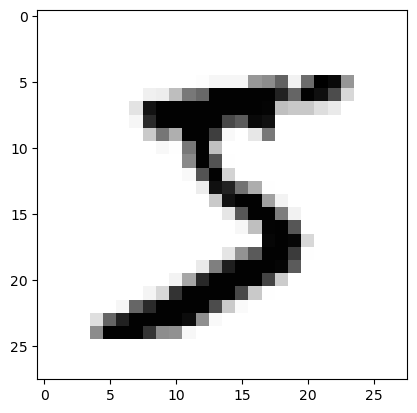

In [29]:
plt.imshow(train_images[0], cmap="Greys")

In [30]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [31]:
model.compile(optimizer='Adagrad',
                loss='mse',
                metrics=['accuracy'])

In [32]:
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

In [33]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [34]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0383 - accuracy: 0.8364
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0230 - accuracy: 0.8969
Epoch 3/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0199 - accuracy: 0.9067
Epoch 4/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0182 - accuracy: 0.9125
Epoch 5/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0171 - accuracy: 0.9171


In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

테스트 정확도: 0.9248


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0162 - accuracy: 0.9207
Epoch 2/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0154 - accuracy: 0.9237
Epoch 3/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0149 - accuracy: 0.9268
Epoch 4/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0144 - accuracy: 0.9289
Epoch 5/5
60000/60000 [==============================] - 7s 108us/sample - loss: 0.0139 - accuracy: 0.9314


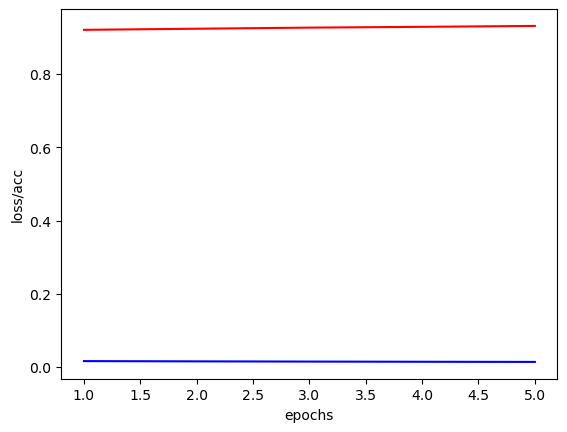

In [36]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()